In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Read the dataset
insurance_df = pd.read_csv('insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Information about the dataset
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Statistics
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# Checking for missing values
missing_values = insurance_df.isnull().sum()
missing_values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

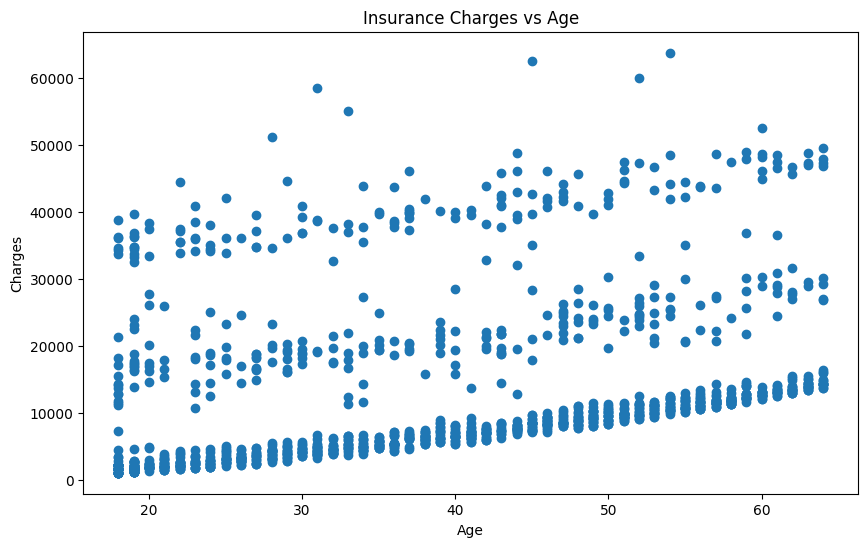

In [8]:
# Visualise the relationship between charges and age
X = insurance_df[['age']].values
y = insurance_df['charges'].values

plt.figure(figsize=[10, 6])
plt.scatter(X, y)
plt.title('Insurance Charges vs Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [9]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Predicting charges on the test set
y_pred = model.predict(X_test)

In [12]:
# Calculating performance metrics
mse = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {R2}")

Mean Squared Error: 135983957.4805469
R-Squared: 0.12408973539501944


C:\Users\44746\AppData\Local\Temp\ipykernel_18184\2099478623.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], '--k', c='red', linewidth=2)


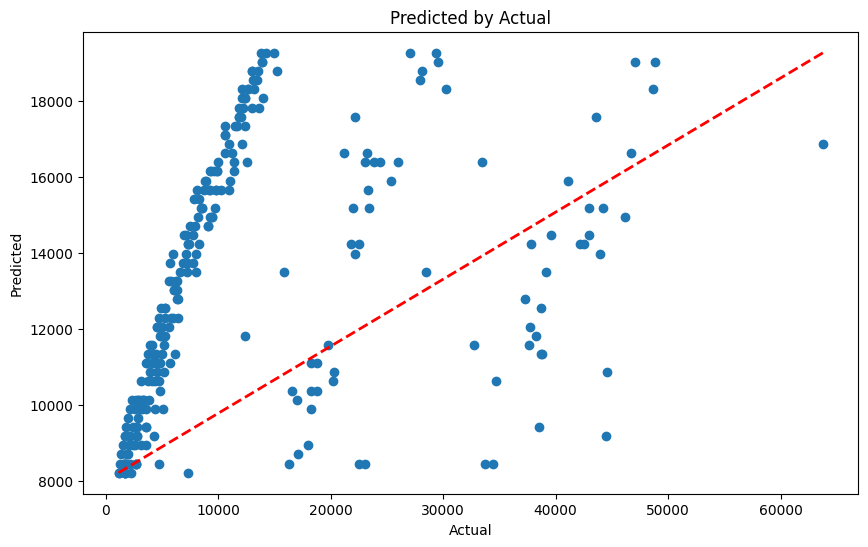

In [23]:
# Visualising predicted and actual values with the line of best fit
plt.figure(figsize=[10, 6])
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], '--k', c='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted by Actual')
plt.show()

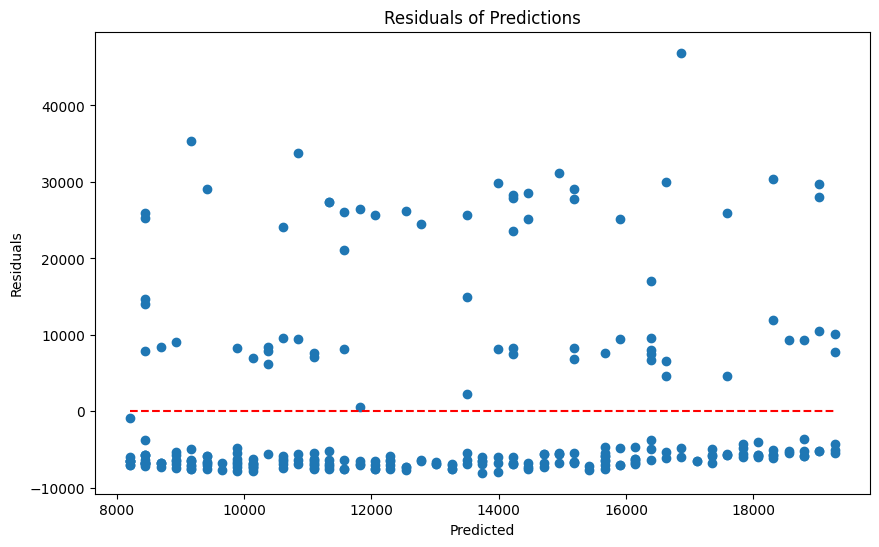

In [26]:
# Visualising residuals using a scatter plot
residuals = y_test - y_pred

plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')
plt.show()

The R-squared value is closer to 0 and the mean squared error (MSE) is very high. Additionally, the scatter plot shows that the model does not fit the data well. These results indicate that the model is performing poorly and is not able to accurately capture the variance in the data or make accurate predictions.